# Proyek Analisis Data: Nama dataset
- Nama: Ryan Dwiky Darmawan
- Email:ryandwikidermawan06@gmail.com
- Id Dicoding: ryandwiky

## Menentukan Pertanyaan Bisnis

- Bagaimana performa peminjaman sepeda setiap bulannya dari tahun 2011 hingga 2012?
- Bagaimana performa peminjaman sepeda setiap musim?


## Menyaipkan semua library yang dibuthkan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("https://raw.githubusercontent.com/RYANDEXT/bikesharinganalysis/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/RYANDEXT/bikesharinganalysis/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
day_df[day_df.instant == day_df.instant.mode()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [15]:
day_df[(day_df['yr'] != 1) & (day_df['yr'] != 0)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [16]:
hour_df[(hour_df['yr'] != 1) & (hour_df['yr'] != 0)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### Cleaning Data

In [17]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

In [18]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
day_df.describe(include="all")

<ipython-input-19-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [20]:
day_df.groupby(by="weathersit").agg({
    "registered": ["max", "min", "mean", "std", "sum"],
    "casual": ["max", "min", "mean", "std", "sum"],
    "cnt" : ["max", "min", "mean", "std","sum"]
})

registered                                         casual      \
                  max  min         mean          std      sum    max min   
weathersit                                                                 
1                6946  416  3912.755940  1533.347265  1811606   3410  15   
2                6844  491  3348.510121  1463.566884   827082   3155   9   
3                4324   20  1617.809524  1068.290954    33974   1264   2   

                                             cnt                    \
                  mean         std     sum   max  min         mean   
weathersit                                                           
1           964.030238  700.476488  446346  8714  431  4876.786177   
2           687.352227  619.082767  169776  8362  605  4035.862348   
3           185.476190  260.975022    3895  4639   22  1803.285714   

                                  
                    std      sum  
weathersit                        
1           1879.483989  2257952  
2           1809.109918   996858  
3           1240.284449    37869

In [21]:
day_df.groupby(by="yr").agg({
    "registered": ["max", "min", "mean", "std", "sum"],
    "casual": ["max", "min", "mean", "std", "sum"],
    "cnt" : ["max", "min", "mean", "std", "sum"]
})

registered                                         casual                   \
          max  min         mean          std      sum    max min         mean   
yr                                                                              
0        4614  416  2728.358904  1060.110413   995851   3065   9   677.402740   
1        6946   20  4581.450820  1424.331846  1676811   3410   2  1018.483607   

                         cnt                                          
           std     sum   max  min         mean          std      sum  
yr                                                                    
0   556.269121  247252  6043  431  3405.761644  1378.753666  1243103  
1   758.989897  372765  8714   22  5599.934426  1788.667868  2049576

In [22]:
day_df.groupby(by="mnth").agg({
    "registered": ["sum"],
    "casual": ["sum"],
    "cnt" : ["sum"]
}).sort_values(by=('cnt', 'sum'), ascending=False)


,registered,casual,cnt
,sum,sum,sum
mnth,,,
8,279155,72039,351194
6,272436,73906,346342
9,275668,70323,345991
7,266791,78157,344948
5,256401,75285,331686
10,262592,59760,322352
4,208292,60802,269094
11,218228,36603,254831


In [23]:
hour_df.groupby(by='hr').agg({
    'cnt': 'sum'
}).sort_values(by=('cnt'), ascending=False)

,cnt
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


In [24]:
day_df.groupby(by="holiday").cnt.nunique().sort_values(ascending=False)

holiday
0    679
1     20
Name: cnt, dtype: int64

In [25]:
day_df.groupby(by="workingday").cnt.nunique().sort_values(ascending=False)

workingday
1    487
0    223
Name: cnt, dtype: int64

In [26]:
day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)


weathersit
1    451
2    243
3     21
Name: cnt, dtype: int64

In [27]:
byseason_df = day_df.groupby("season")["cnt"].sum().reset_index()
byseason_df.sort_values(by="cnt", ascending=True)

,season,cnt
0,1,471348
3,4,841613
1,2,918589
2,3,1061129


In [28]:
day_df["windspeed_kategory"] = day_df.windspeed.apply(lambda x: "normal" if x <= 0.5 else "extreme")
day_df.groupby(by='windspeed_kategory').agg({
    'cnt': 'sum'
}).sort_values(by=('cnt'), ascending=False)

,cnt
windspeed_kategory,
normal,3291044
extreme,1635


In [29]:
day_df["humidity_level"] = day_df.hum.apply(lambda x: "very dry" if x <= 0.2 else ("dry" if 0.2 < x <= 0.4 else ("normal" if 0.4 < x <= 0.6 else ("humid" if 0.6 < x <= 0.8 else "very humid"))))
day_df.groupby(by='humidity_level').agg({
    'cnt': 'sum'
}).sort_values(by=('cnt'), ascending=False)

,cnt
humidity_level,
humid,1508967
normal,1343546
very humid,313184
dry,124724
very dry,2258


## Visualization & Explanatory Analysis

### Pertanyaan 1:

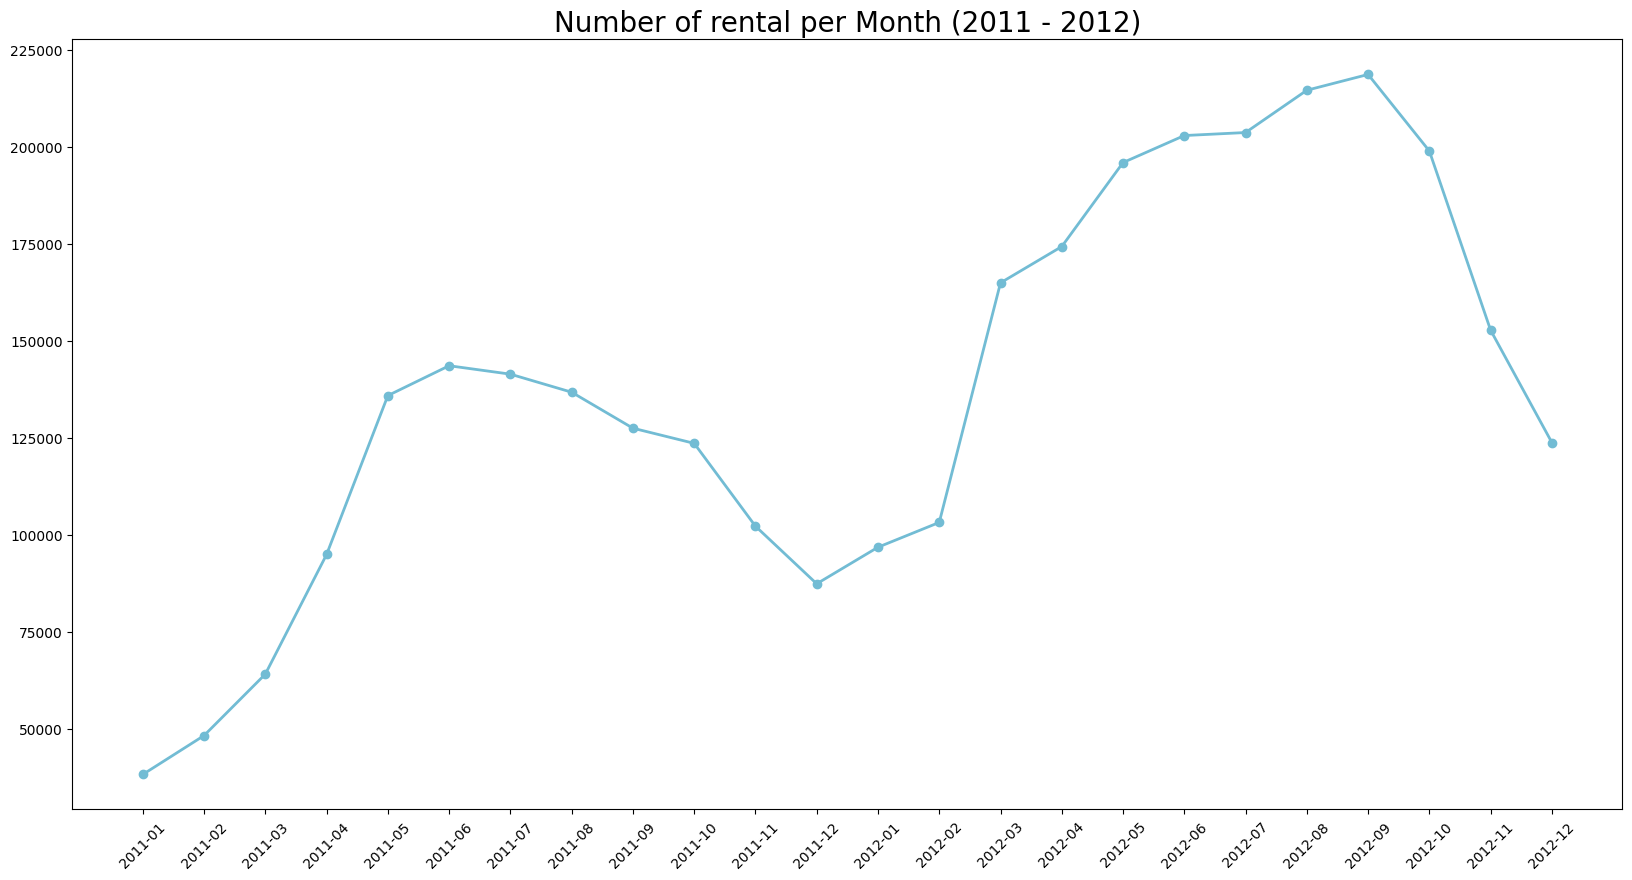

In [30]:
monthly_df = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_df.index = monthly_df.index.strftime('%Y-%m')
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "cnt": "total_rental"
}, inplace=True)

plt.figure(figsize=(20, 10))
plt.plot(monthly_df["dteday"], monthly_df["total_rental"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of rental per Month (2011 - 2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2:

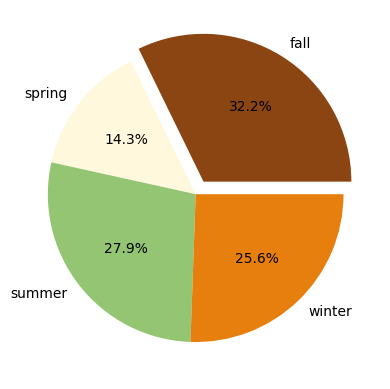

In [31]:
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
day_df['season'] = day_df['season'].replace(season_mapping)

byseason_df =  day_df.groupby(by="season").cnt.sum().reset_index()
byseason_df.rename(columns={
    "cnt": "rental_count"
}, inplace=True)
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D')
explode = (0.1, 0, 0, 0)
plt.pie(
    x=byseason_df['rental_count'],
    labels=byseason_df['season'],
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()

## Conclusion

- conclution pertanyaan 1:
berdasarkan data tersebut, performa peminjaman sepeda tiap bulannya dari januari 2011 hingga desember 2012 mengalami kenaikan yang signifikan, dan juga terdapat pola yang bisa diambil dari grafik line chart tersebut bahwa pada awal tahun selalu terjadi kenaikan peminjaman sepeda dan diikuti pada pertengahan tahun peminjaman sepeda selalu menurun
- conclution pertanyaan 2:
Berdasarkan data tersebut performa peminjaman sepeda dipengaruhi oleh musim, dengan tingkat peminjaman sepeda dari terbesar ke terkecil yaitu berada pada musim fall, summer, winter, spring

In [32]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant             731 non-null    int64         
 1   dteday              731 non-null    datetime64[ns]
 2   season              731 non-null    object        
 3   yr                  731 non-null    int64         
 4   mnth                731 non-null    int64         
 5   holiday             731 non-null    int64         
 6   weekday             731 non-null    int64         
 7   workingday          731 non-null    int64         
 8   weathersit          731 non-null    int64         
 9   temp                731 non-null    float64       
 10  atemp               731 non-null    float64       
 11  hum                 731 non-null    float64       
 12  windspeed           731 non-null    float64       
 13  casual              731 non-null    int64         